# Project.info
## Classification tree ML

### Step 1: Load libraries

In [1]:
import gzip 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt# we only need pyplot
from sklearn.preprocessing import LabelEncoder
sb.set() # set the default Seaborn style for graphics

In [2]:
with gzip.open('train.gz') as f:
    features = pd.read_csv(f) 

### Step 2: Basic Exploration

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 7.2+ GB


In [4]:
print("Number of click :", len(features["click"].unique()))
print(features["click"].value_counts())

Number of click : 2
0    33563901
1     6865066
Name: click, dtype: int64


In [5]:
print("Number of hour :", len(features["hour"].unique()))
print(features["hour"].value_counts())

Number of hour : 240
14102209    447783
14102210    438270
14102813    432308
14102212    408650
14102814    387453
             ...  
14102419     34163
14102423     25622
14102420     23124
14102421     20367
14102422     14876
Name: hour, Length: 240, dtype: int64


In [6]:
print("Number of banner :", len(features["banner_pos"].unique()))
print(features["banner_pos"].value_counts())

Number of banner : 7
0    29109590
1    11247282
7       43577
2       13001
4        7704
5        5778
3        2035
Name: banner_pos, dtype: int64


In [7]:
print("Number of sitecat :", len(features["site_category"].unique()))
print(features["site_category"].value_counts())

Number of sitecat : 26
50e219e0    16537234
f028772b    12657073
28905ebd     7377208
3e814130     3050306
f66779e6      252451
75fa27f6      160985
335d28a8      136463
76b2941d      104754
c0dd3be3       42090
72722551       28216
dedf689d       24500
70fb0e29       24224
0569f928       17106
8fd0aea4        7482
a818d37a        3230
42a36e14        2515
e787de0e        1209
bcf865d9        1045
5378d028         483
9ccfa2ea         318
c706e647          28
da34532e          23
74073276          14
110ab22d           6
6432c423           2
a72a0145           2
Name: site_category, dtype: int64


In [8]:
print("Number of appcat :", len(features["app_category"].unique()))
print(features["app_category"].value_counts())

Number of appcat : 36
07d7df22    26165592
0f2161f8     9561058
cef3e649     1731545
8ded1f7a     1467257
f95efa07     1141673
d1327cf5      123233
09481d60       54886
dc97ec06       54644
75d80bbe       40108
fc6fa53d       23663
4ce2e9fc       20762
879c24eb       12785
a3c42688       11121
4681bb9d        6291
0f9a328c        5584
a86a3e89        2497
2281a340        2243
8df2e842        1679
79f0b860         605
0bfbc358         425
a7fd01ec         362
7113d72a         304
2fc4f2aa         234
18b1e0be         212
5326cf99         133
0d82db25          25
4b7ade46          16
bf8ac856           9
bd41f328           6
71af18ce           5
86c1a5a3           3
6fea3693           2
ef03ae90           2
52de74cf           1
f395a87f           1
cba0e20d           1
Name: app_category, dtype: int64


In [9]:
feat = features.sample(n=10000)
feat.to_csv('sample.csv', index=None, header=True)
df=feat
feat.shape

(10000, 24)

Number of click : 2
0    8294
1    1706
Name: click, dtype: int64


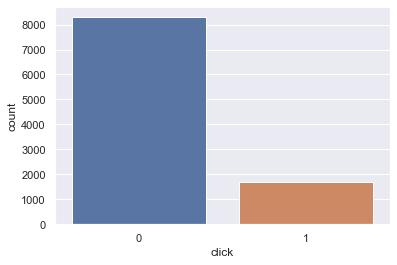

In [10]:
print("Number of click :", len(feat["click"].unique()))
print(feat["click"].value_counts())

sb.countplot(data=feat, x='click')
plt.show()


In [11]:
label_encoder = LabelEncoder()
feat.drop(['id', 'device_id', 'device_ip','C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C1'], axis=1, inplace=True)
for col in feat.columns:
    if col not in ['click', 'hour']:
        feat[col] = label_encoder.fit_transform(feat[col].astype(str))

In [12]:
feat['hour']=feat['hour']%100

In [13]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10384116 to 29830818
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   click             10000 non-null  int64
 1   hour              10000 non-null  int64
 2   banner_pos        10000 non-null  int32
 3   site_id           10000 non-null  int32
 4   site_domain       10000 non-null  int32
 5   site_category     10000 non-null  int32
 6   app_id            10000 non-null  int32
 7   app_domain        10000 non-null  int32
 8   app_category      10000 non-null  int32
 9   device_model      10000 non-null  int32
 10  device_type       10000 non-null  int32
 11  device_conn_type  10000 non-null  int32
dtypes: int32(10), int64(2)
memory usage: 625.0 KB


In [14]:
feat.head(n=10)

,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type
10384116,0,5,0,65,448,1,397,18,0,194,1,0
29919568,1,13,0,65,448,1,397,18,0,1146,1,0
26780924,0,20,0,65,448,1,397,18,0,1293,1,0
7708529,0,13,0,289,376,4,389,6,2,1146,1,0
34329653,0,11,1,152,369,14,397,18,0,727,1,0
30377467,0,14,1,498,227,14,397,18,0,1151,1,0
38583479,1,12,0,289,376,4,264,6,15,184,1,0
24284125,0,4,0,478,134,14,397,18,0,848,1,0
5154846,1,6,0,185,380,3,397,18,0,1146,1,0
584391,1,3,0,65,448,1,397,18,0,580,1,0


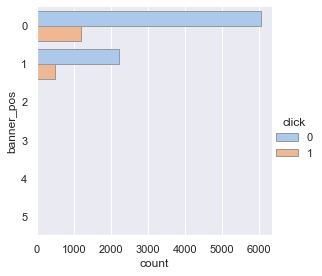

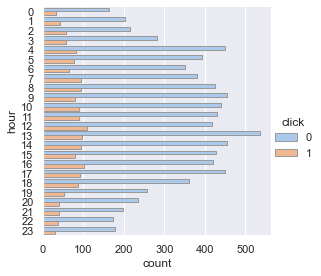

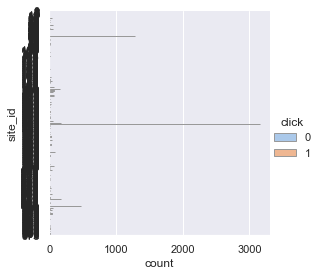

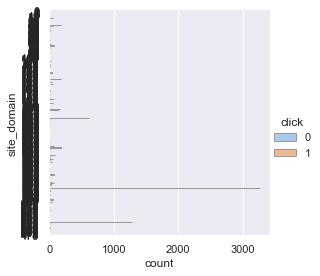

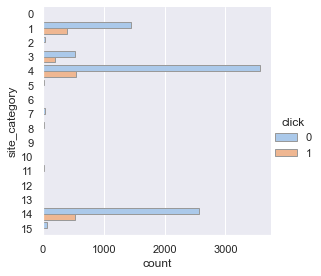

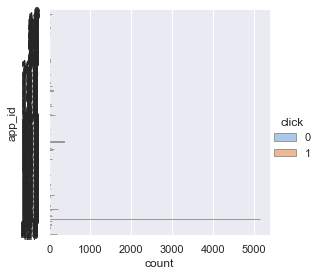

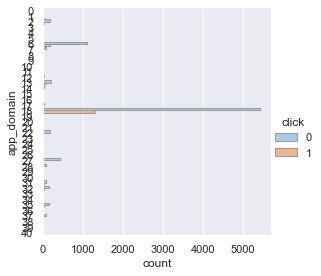

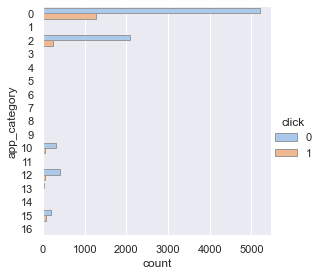

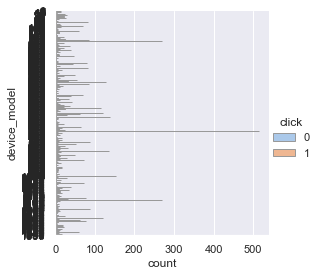

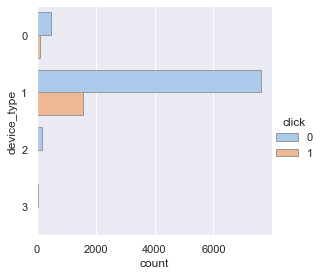

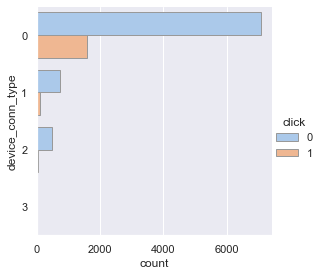

In [15]:
sb.catplot( data =feat, y ="banner_pos", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4)
sb.catplot( data =feat, y ="hour", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4  )
sb.catplot( data =feat, y ="site_id", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4  )
sb.catplot( data =feat, y ="site_domain", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4  )
sb.catplot( data =feat, y ="site_category", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4)
sb.catplot( data =feat, y ="app_id", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4  )
sb.catplot( data =feat, y ="app_domain", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4  )
sb.catplot( data =feat, y ="app_category", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4  )
sb.catplot( data =feat, y ="device_model", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4)
sb.catplot( data =feat, y ="device_type", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4  )
sb.catplot( data =feat, y ="device_conn_type", hue="click", kind = "count", palette="pastel", edgecolor=".6", height= 4  )
plt.show()

### Step 3: Defining the Decision Tree
    

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dectree = DecisionTreeClassifier(max_depth = 20)

In [17]:
y = feat['click']
X = feat.drop('click', axis=1)
X

,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type
10384116,5,0,65,448,1,397,18,0,194,1,0
29919568,13,0,65,448,1,397,18,0,1146,1,0
26780924,20,0,65,448,1,397,18,0,1293,1,0
7708529,13,0,289,376,4,389,6,2,1146,1,0
34329653,11,1,152,369,14,397,18,0,727,1,0
...,...,...,...,...,...,...,...,...,...,...,...
18879194,15,1,481,290,14,397,18,0,594,1,0
13281209,23,0,289,376,4,143,28,2,458,1,0
21247848,8,1,201,30,14,397,18,0,575,1,0
5937881,9,0,289,376,4,198,32,12,442,1,0


### Step 4: Spliting into train and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (8000,) (8000, 11)
Test Set  : (2000,) (2000, 11)


### Step 5: Putting parameters into Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.950125

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.767

Accuracy: 0.767
Precision: 0.2743682310469314
Recall: 0.22287390029325513
F1-Score: 0.2459546925566343


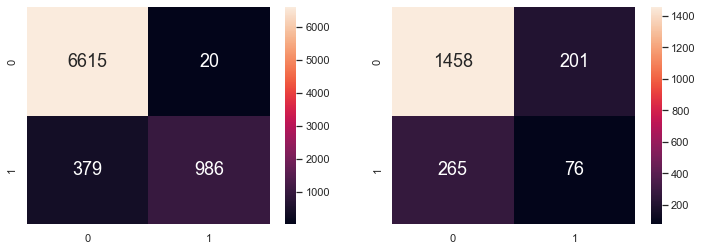

In [19]:
dectree.fit(X_train, y_train)          

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1-Score:', f1_score(y_test, y_test_pred))



f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

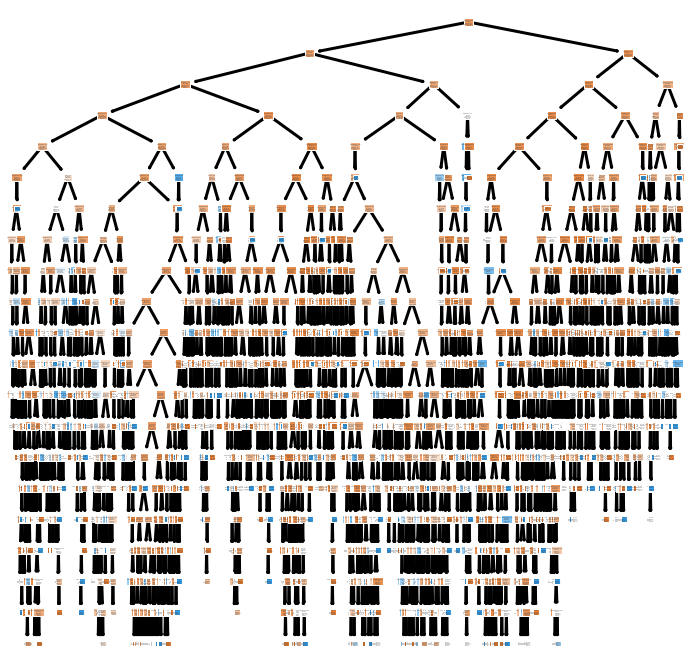

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
plt.show()

In [21]:
dectree = DecisionTreeClassifier(max_depth = 3)

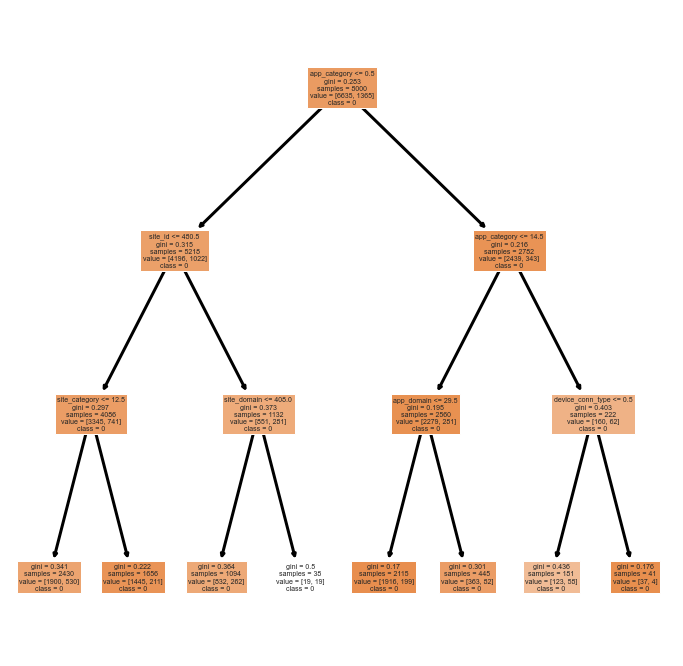

In [22]:
dectree.fit(X_train, y_train)          

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
plt.show()

# New method Random Forest Classifier
##  Additional tools:
## Oversampling
## One-hot encoding
## Halving Grid Search
### Step 1: Import necessary libraries and load data

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV



### Step 2: Drop unnecessary columns and convert click column to binary categorical column

In [24]:
df['click'] = df['click'].astype('category').cat.codes

In [25]:
df['hour']=df['hour']%100

In [26]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10384116 to 29830818
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   click             10000 non-null  int8 
 1   hour              10000 non-null  int64
 2   banner_pos        10000 non-null  int32
 3   site_id           10000 non-null  int32
 4   site_domain       10000 non-null  int32
 5   site_category     10000 non-null  int32
 6   app_id            10000 non-null  int32
 7   app_domain        10000 non-null  int32
 8   app_category      10000 non-null  int32
 9   device_model      10000 non-null  int32
 10  device_type       10000 non-null  int32
 11  device_conn_type  10000 non-null  int32
dtypes: int32(10), int64(1), int8(1)
memory usage: 556.6 KB


### Step 3: Convert categorical columns to one-hot encoding

In [27]:
df_new = pd.get_dummies(df, columns=['hour','site_id', 'site_domain', 'site_category', 'app_id','app_domain', 'app_category', 'device_model', 'device_conn_type','device_type'])

In [28]:
df_new

,click,banner_pos,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,device_model_1356,device_model_1357,device_conn_type_0,device_conn_type_1,device_conn_type_2,device_conn_type_3,device_type_0,device_type_1,device_type_2,device_type_3
10384116,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
29919568,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
26780924,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7708529,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
34329653,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18879194,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
13281209,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
21247848,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5937881,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Step 4: Preprocess data by scaling and balancing classes

In [29]:
scaler = StandardScaler()
X = df_new.drop('click', axis=1)
y = df_new['click']
X = scaler.fit_transform(X)

In [30]:
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

Number of click : 2
0    8294
1    8294
Name: click, dtype: int64


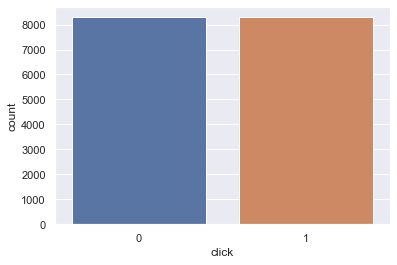

In [41]:
print("Number of click :", len(y.unique()))
print(y.value_counts())

sb.countplot(data=pd.DataFrame(y), x='click')
plt.show()

### Step 5: Split data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

### Step 6: Train random forest classifier and fine-tune hyperparameters using Halving Grid Search

In [33]:
rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
search = HalvingGridSearchCV(rf, params, scoring='f1', n_jobs=8)
search.fit(X_train, y_train)

HalvingGridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=8,
                    param_grid={'max_depth': [None, 10, 20],
                                'max_features': ['sqrt', 'log2'],
                                'min_samples_leaf': [1, 2, 4],
                                'min_samples_split': [2, 5, 10],
                                'n_estimators': [50, 100, 200]},
                    scoring='f1')

### Step 7: Evaluate model performance on testing set

In [34]:
y_pred = search.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.903254972875226
Precision: 0.8604904632152589
Recall: 0.9604622871046229
F1-Score: 0.9077321069272779


In [35]:
X1 = df_new.drop('click', axis=1)

In [36]:
rf_best = search.best_estimator_
rf_best

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)

In [37]:
rf_best.feature_importances_

array([0.00775558, 0.00484406, 0.00764598, ..., 0.00120629, 0.00071765,
       0.00028914])

In [38]:
imp_df = pd.DataFrame({
    "Varname": X1.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
13,hour_12,0.012665
17,hour_16,0.012213
2304,device_model_727,0.012086
11,hour_10,0.011971
14,hour_13,0.011967
...,...,...
1273,app_id_182,0.000000
1919,device_model_342,0.000000
1266,app_id_175,0.000000
1255,app_id_164,0.000000


In [39]:
X_train1 = pd.DataFrame(X_train)
X_train1

,0,1,2,3,4,5,6,7,8,9,...,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942
0,-0.596208,-0.141024,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,-0.208079,-0.223066,-0.23373,...,-0.010001,-0.010001,0.392176,-0.298872,-0.229657,-0.034662,-0.252197,0.297879,-0.138795,-0.052989
1,-0.596208,-0.141024,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,4.805870,-0.223066,-0.23373,...,-0.010001,-0.010001,0.392176,-0.298872,-0.229657,-0.034662,-0.252197,0.297879,-0.138795,-0.052989
2,1.542271,-0.141024,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,-0.208079,-0.223066,-0.23373,...,-0.010001,-0.010001,0.392176,-0.298872,-0.229657,-0.034662,-0.252197,-3.357073,7.204863,-0.052989
3,-0.596208,-0.141024,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,-0.208079,-0.223066,-0.23373,...,-0.010001,-0.010001,0.392176,-0.298872,-0.229657,-0.034662,-0.252197,0.297879,-0.138795,-0.052989
4,-0.596208,-0.141024,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,-0.208079,-0.223066,-0.23373,...,-0.010001,-0.010001,-2.549878,3.345911,-0.229657,-0.034662,-0.252197,0.297879,-0.138795,-0.052989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13265,-0.596208,-0.141024,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,-0.208079,-0.223066,-0.23373,...,-0.010001,-0.010001,0.392176,-0.298872,-0.229657,-0.034662,-0.252197,0.297879,-0.138795,-0.052989
13266,1.542271,7.090984,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,-0.208079,-0.223066,-0.23373,...,-0.010001,-0.010001,0.392176,-0.298872,-0.229657,-0.034662,-0.252197,0.297879,-0.138795,-0.052989
13267,-0.596208,-0.141024,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,-0.208079,-0.223066,-0.23373,...,-0.010001,-0.010001,-2.549878,3.345911,-0.229657,-0.034662,-0.252197,0.297879,-0.138795,-0.052989
13268,-0.596208,-0.141024,-0.158146,-0.166581,-0.187322,-0.237278,-0.22158,-0.208079,-0.223066,-0.23373,...,-0.010001,-0.010001,-2.549878,-0.298872,4.354317,-0.034662,-0.252197,0.297879,-0.138795,-0.052989


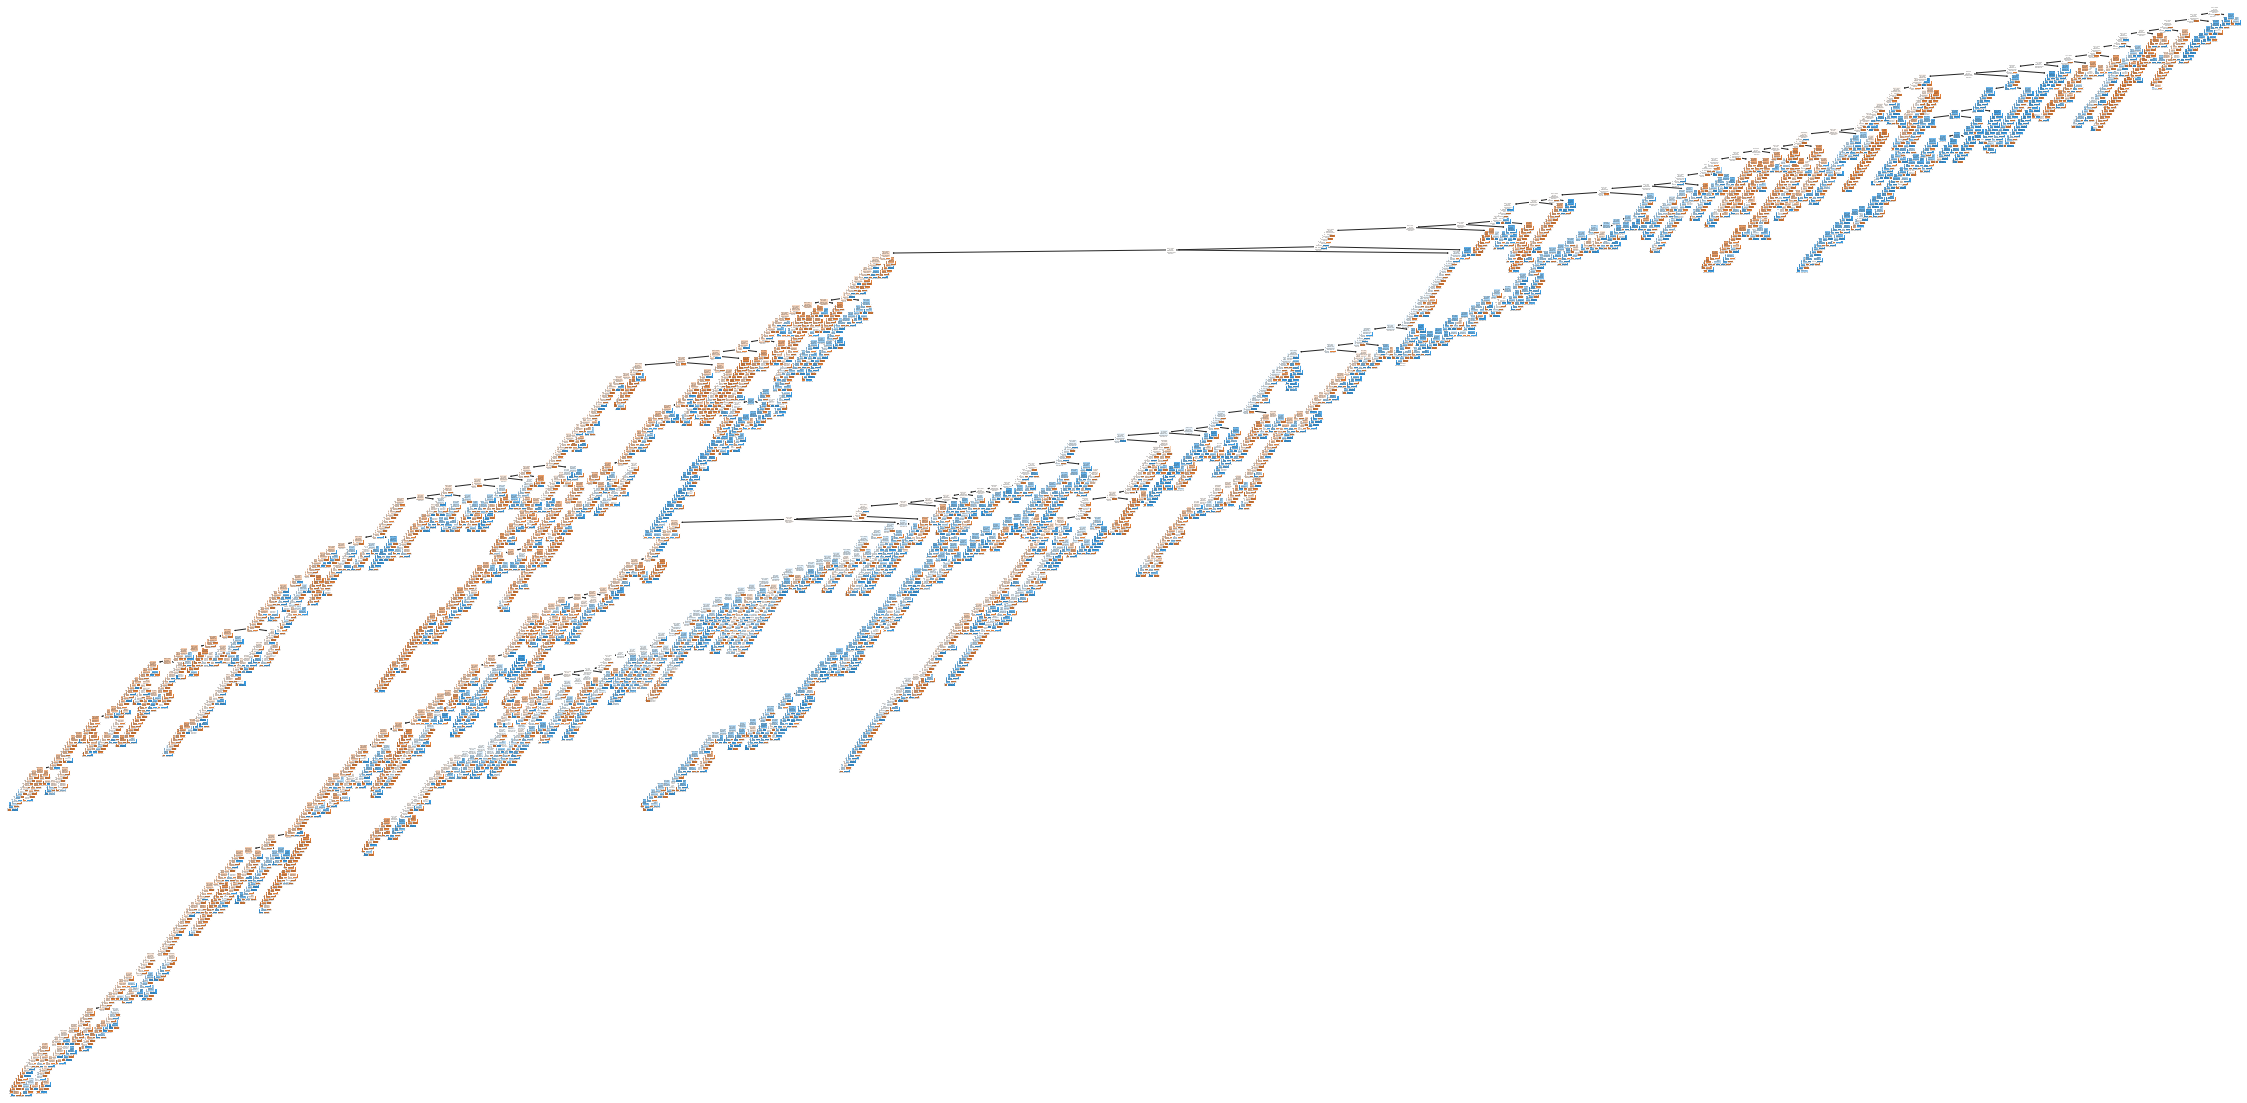

In [40]:
plt.figure(figsize=(40,20))
plot_tree(rf_best.estimators_[2],
          feature_names = X_train1.columns,
          class_names=['click', 'No click'],
          filled=True)
plt.show()